In [1]:

import pandas as pd  # CSV ya Excel file ko read karne ke liye
import numpy as np  # Numeric calculations ke liye
import matplotlib.pyplot as plt  # Graphs banane ke liye
import seaborn as sns  # Beautiful graphs banane ke liye   

In [2]:
# Scikit-learn se ML tools import
from sklearn.model_selection import train_test_split  # Data split karne ke liye (train/test)
from sklearn.preprocessing import LabelEncoder  # Categorical values ko numeric mein convert karne ke liye
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Tree model aur uska graph
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation

In [3]:

df = pd.read_csv('farmer.csv')  # CSV file read kar ke DataFrame bana liya
df.head()  # Top 5 rows dikhata hai — jaise preview

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:

print(df.isnull().sum())  # Check karta hai ki koi column missing hai kya

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [5]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
print(df.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [30]:
char =df.select_dtypes(include='object')

In [31]:
char

""
0
1
2
3
4
...
2195
2196
2197
2198


In [32]:
num=df.select_dtypes(exclude='object')

In [33]:
num

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [8]:
# Label Encoding — crop names ko numbers mein badalna
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # e.g., 'rice' → 0, 'wheat' → 1

In [34]:
num

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [36]:
char


""
0
1
2
3
4
...
2195
2196
2197
2198


In [37]:
clean_data=pd.concat([char,num], axis=1)

In [38]:
clean_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [39]:
clean_data.to_csv('new_cleaned_farmer.csv', index=False)

In [41]:
df=pd.read_csv("new_cleaned_farmer.csv")

In [42]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [9]:
# Features (X) aur Target (y) split karna
X = df.drop('label', axis=1)  # sari columns except 'label'
y = df['label']  # target crop label

In [10]:
# Training aur Testing data mein split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = model.predict(X_test)

In [52]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9931818181818182
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00     

In [11]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [12]:
y_test

1451    15
1334    21
1761    17
1735    17
1576     0
        ..
59      20
71      20
1908     6
1958     6
482     18
Name: label, Length: 440, dtype: int64

In [13]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [54]:
import joblib

# ✅ Save the model
joblib.dump(model, "model_of_farmer.pkl")  # Use .pkl as a standard extension
joblib.dump(le, "crop_label_encoder.pkl")   # labelencoder object
# ✅ Load the model
loaded_model = joblib.load("model_of_farmer.pkl")

predictions = loaded_model.predict(X_test)
print("Predictions:", predictions)

Predictions: [15 21 17 17  0 12  0 13 14 10  2  4 19  8  4 19  0 11 17 15  5 17 16 17
  3  8 14 16 18 20 19 13  8 10  8  2  8  3  3  9 17 12  2 11 14 11 18  4
 15 11  2  5  7 14  5  9  6  0  1  2 21  4 10 16 17 18 16 20 15 18 15  4
  8  1  2 17  1  6 21 16  5  3 20 13 16 12  5 13  2 19 11 13  6 17 18 13
  9  5  2 10  4 20 16 15 21  9 21  1 18 13  1  8  6 19 18  3 11  4 19 20
 18  7  2  4  3  2  4 11  1 13  1  9 19  3  4 16 18  1  1  0  9 15 14 13
  4 11  0  4  9 13 14 10 21 14 18 18 18  9 11  8  3  0 16  6 20  4  7 10
 21  7  7  2 19  3  4 11 10  7 21  8  5  5  9  8 13  9  1  9  4 17 17 14
 12 19 21  9 11  0  2  3  7  7  1  6 20 19 14  1  8 14 11  3  3  3  0 20
  9 17  5  2  9 12 12  4 17  0  3 19  3 15  0 15 15 12 12  6  4 19 20 15
  5 17 13 11 12 15 18 14  5  7  4  6 18 20  0 19  5  3  6  8 12  1 17  0
  3 20 18 13 14  8 19  7 13  8 11  4 11  3  1  8  4  8 12 15  0  1 18  2
 16  3 21  1  0  3  5 18 16  0  4 17 21 13 17  3 19  3 17 10  0 19  3 12
  3 19 21  9 14 15 21  9 15 12  8  2  

In [14]:
# Decision Tree Classifier

dt = DecisionTreeClassifier(random_state=42)  # Decision Tree model banaya
dt.fit(X_train, y_train)  # Training data se model train kiya

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [15]:
# Decision Tree Classifier
 
# Test data pe prediction
y_pred_dt = dt.predict(X_test)


In [16]:
# Decision Tree Classifier

# Model evaluation (accuracy aur confusion matrix)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))  # actual vs predicted
print(classification_report(y_test, y_pred_dt))  # precision, recall, f1-score

Decision Tree Accuracy: 0.9863636363636363
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  1  0  0 22  0  0  0  0  0  

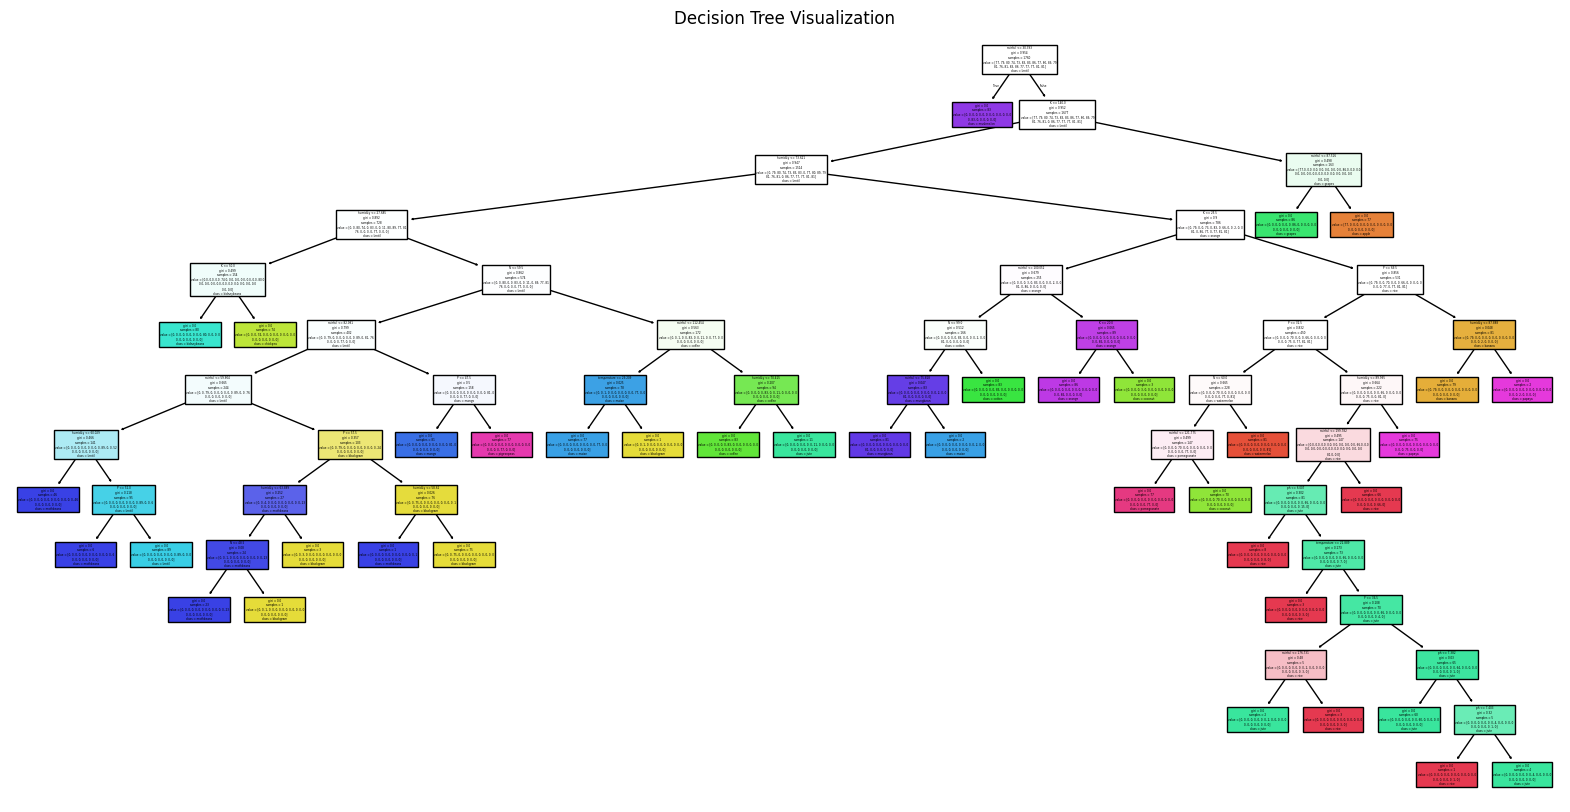

In [17]:
# Decision Tree Visualization

plt.figure(figsize=(20,10))  # graph ka size set kiya
plot_tree(dt, feature_names=X.columns, class_names=le.classes_, filled=True)  # tree draw kiya
plt.title("Decision Tree Visualization")  # title diya
plt.show()  # graph display kiya

In [18]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=150,random_state=42,max_depth=3,min_samples_leaf=2)  # Random Forest model banaya
rf.fit(X_train, y_train)  # model train kiya

,n_estimators,150
,criterion,'gini'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
# Random Forest Classifier

# Test pe prediction
y_pred_rf = rf.predict(X_test)

In [20]:
# Random Forest Classifier

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8613636363636363
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  1  0  0  0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  3  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  7  0  0  0  0  0  0  0 15  0  2  0  0  0  0  0  0  

c:\Users\welcome\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\welcome\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\welcome\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_p

In [21]:
# Features Importance (Random Forest)

importances = rf.feature_importances_  # har feature ka importance score
features = X.columns  # feature names
indices = np.argsort(importances)  # sorting for better visualization

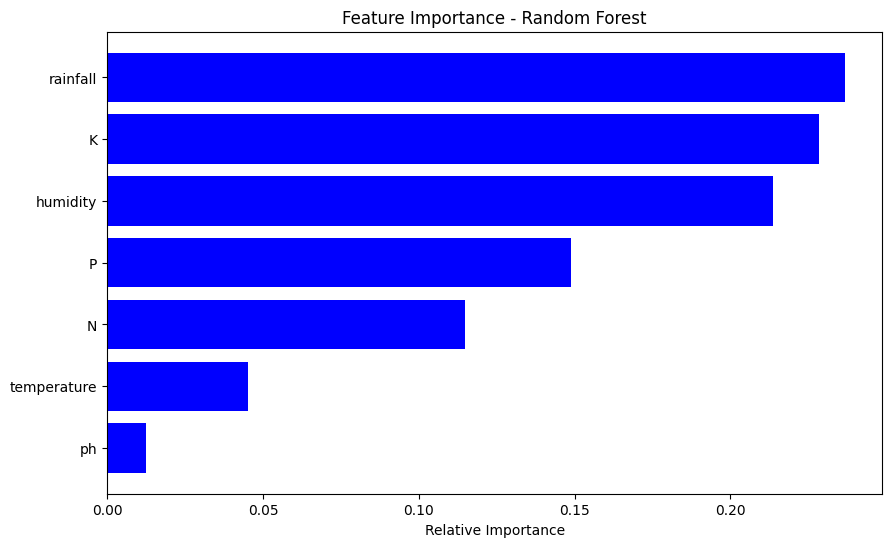

In [22]:
# Feature Importance Bar Chart
plt.figure(figsize=(10,6))
plt.title("Feature Importance - Random Forest")
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])  # feature names on Y axis
plt.xlabel('Relative Importance')  # X-axis label
plt.show()

In [23]:
rf.score(X_test,y_test)

0.8613636363636363

In [24]:
rf.score(X_train,y_train)

0.8892045454545454

In [25]:
# Step 4: Train Naive Bayes model
model = GaussianNB()  # Gaussian Naive Bayes (continuous data ke liye)
model.fit(X_train, y_train)

c:\Users\welcome\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)


,priors,None
,var_smoothing,1e-09


In [26]:
y_pred = model.predict(X_test)


In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))  # Accuracy
print(confusion_matrix(y_test, y_pred))             # Confusion matrix
print(classification_report(y_test, y_pred))        # Precision, recall, f1


Accuracy: 0.9954545454545455
[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0]
 [ 0 

In [28]:
model.score(X_test,y_test)

0.9954545454545455

In [29]:
model.score(X_train,y_train)

0.9948863636363636